<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/Copy_of_Lung_Cancer_Survival_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Get the filename (should be your CSV file)
file_name = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_name)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
display(df.head())

Saving dataset_med.csv to dataset_med.csv
Dataset loaded successfully!
Shape: (890000, 17)


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
# Handle missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill numerical missing values
num_cols = ['age', 'bmi', 'cholesterol_level']
for col in num_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values
cat_cols = ['gender', 'cancer_stage', 'smoking_status']
for col in cat_cols:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Convert dates if they exist
date_cols = ['diagnosis_date', 'end_treatment_date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Create treatment duration feature if dates exist
if all(col in df.columns for col in date_cols):
    df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'country', 'cancer_stage', 'family_history',
                   'smoking_status', 'hypertension', 'asthma',
                   'cirrhosis', 'other_cancer', 'treatment_type']

label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Convert target variable
if 'survived' in df.columns:
    df['survived'] = df['survived'].map({'yes': 1, 'no': 0})

# Drop unnecessary columns
cols_to_drop = ['id', 'diagnosis_date', 'end_treatment_date']
df = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)

print("\nData after preprocessing:")
display(df.head())

Missing values before handling:
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


/tmp/ipython-input-2-3475671293.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2-3475671293.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try


Data after preprocessing:


,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,64.0,1,26,0,1,3,29.4,199,0,0,1,0,0,NaN,523
1,50.0,0,19,2,1,3,41.2,280,1,1,0,0,3,NaN,424
2,65.0,0,12,2,1,1,44.0,268,1,1,0,0,1,NaN,370
3,51.0,0,1,0,0,3,43.0,241,1,1,0,0,0,NaN,443
4,37.0,1,17,0,0,3,19.7,178,0,0,0,0,1,NaN,406


In [ ]:
# Create age bins
if 'age' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100],
                            labels=['<40', '40-60', '60-80', '80+'])

# BMI categories
if 'bmi' in df.columns:
    df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Cholesterol levels
if 'cholesterol_level' in df.columns:
    df['cholesterol_level_category'] = pd.cut(df['cholesterol_level'],
                                            bins=[0, 200, 240, 1000],
                                            labels=['Normal', 'Borderline High', 'High'])

# Encode new categorical features
new_cat_cols = ['age_group', 'bmi_category', 'cholesterol_level_category']
for col in new_cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Drop original columns if new features were created
cols_to_drop = []
if 'age_group' in df.columns:
    cols_to_drop.append('age')
if 'bmi_category' in df.columns:
    cols_to_drop.append('bmi')
if 'cholesterol_level_category' in df.columns:
    cols_to_drop.append('cholesterol_level')

df = df.drop(cols_to_drop, axis=1, errors='ignore')

print("\nData after feature engineering:")
display(df.head())


Data after feature engineering:


,gender,country,cancer_stage,family_history,smoking_status,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration,age_group,bmi_category,cholesterol_level_category
0,1,26,0,1,3,0,0,1,0,0,NaN,523,1,2,2
1,0,19,2,1,3,1,1,0,0,3,NaN,424,0,1,1
2,0,12,2,1,1,1,1,0,0,1,NaN,370,1,1,1
3,0,1,0,0,3,1,1,0,0,0,NaN,443,0,1,1
4,1,17,0,0,3,0,0,0,0,1,NaN,406,3,0,2


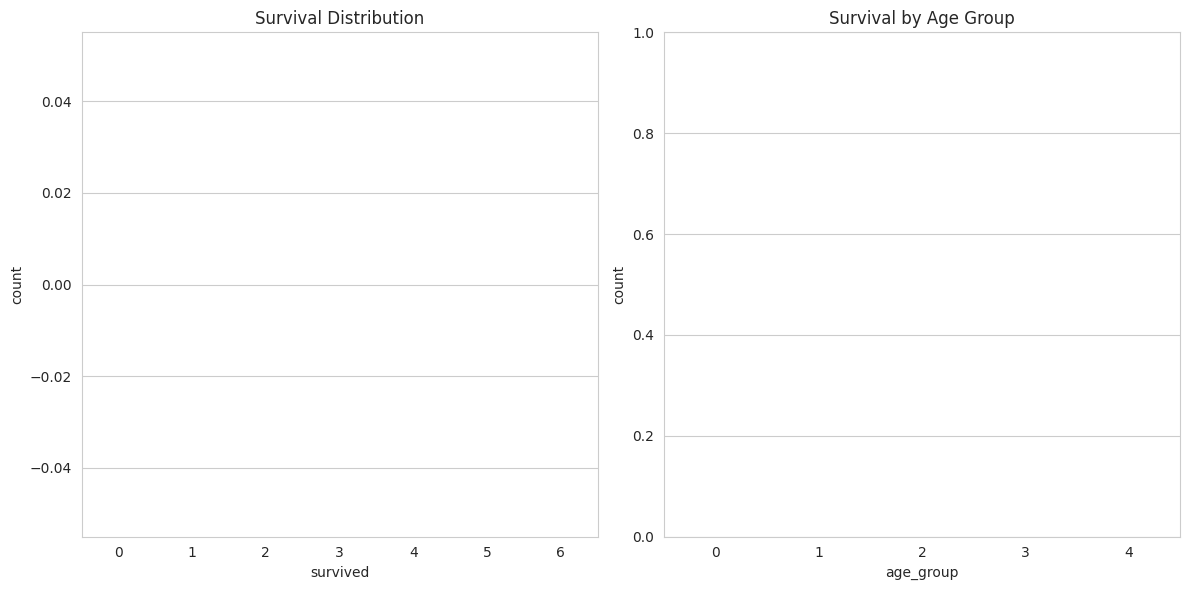

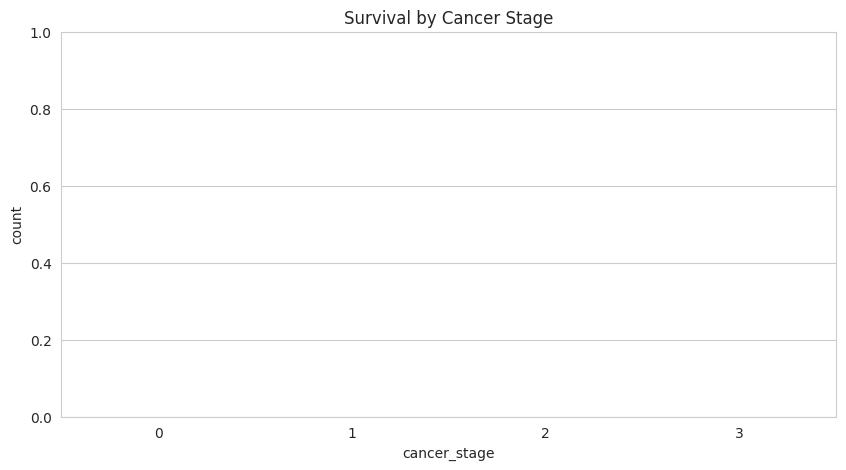

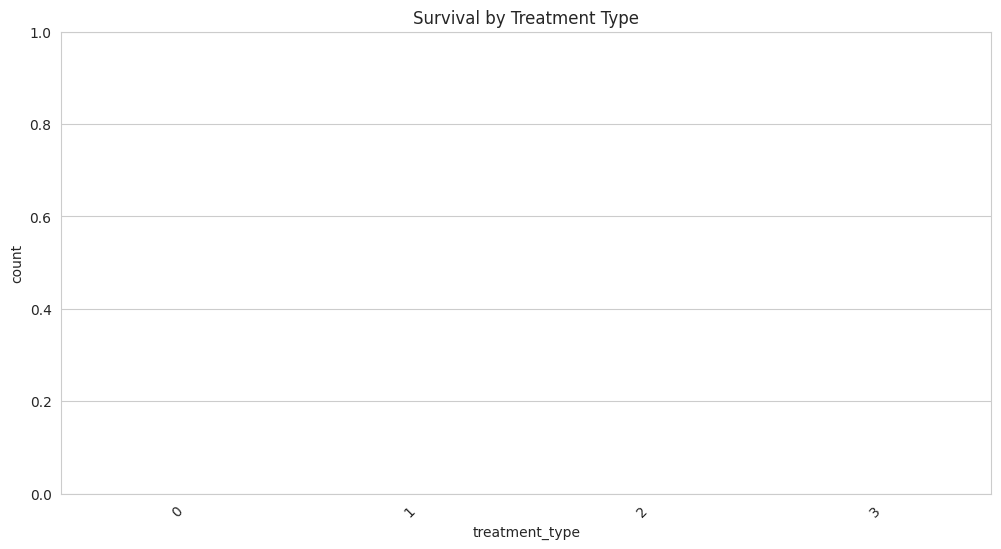

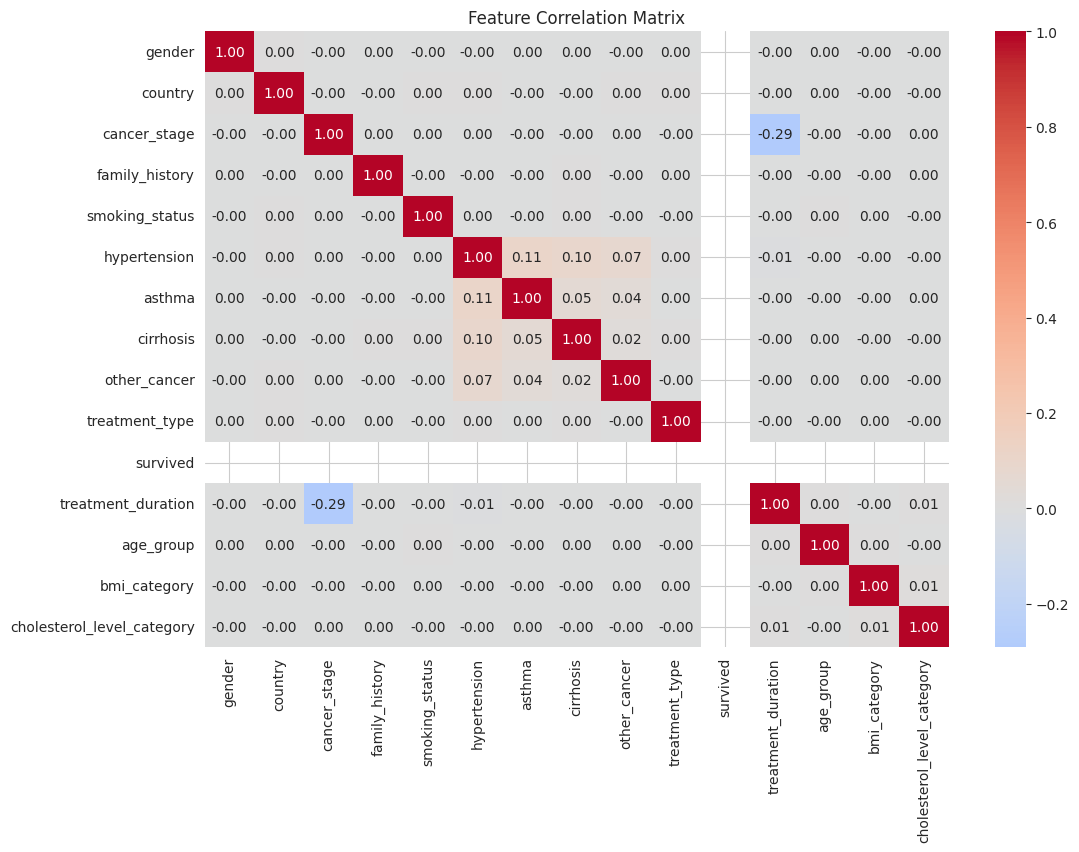

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# 1. Target distribution
if 'survived' in df.columns:
    plt.subplot(1, 2, 1)
    sns.countplot(x='survived', data=df)
    plt.title('Survival Distribution')

# 2. Age distribution (if age_group exists)
if 'age_group' in df.columns:
    plt.subplot(1, 2, 2)
    sns.countplot(x='age_group', hue='survived', data=df)
    plt.title('Survival by Age Group')

plt.tight_layout()
plt.show()

# 3. Cancer stage impact
if 'cancer_stage' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='cancer_stage', hue='survived', data=df)
    plt.title('Survival by Cancer Stage')
    plt.show()

# 4. Treatment type analysis
if 'treatment_type' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='treatment_type', hue='survived', data=df)
    plt.title('Survival by Treatment Type')
    plt.xticks(rotation=45)
    plt.show()

# 5. Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
print("Number of NaN values in 'survived':", df['survived'].isna().sum())

Number of NaN values in 'survived': 890000


In [ ]:
print("Original dataset shape:", df.shape)
df = df.dropna(subset=['survived'])  # Remove rows where 'survived' is NaN
print("Cleaned dataset shape:", df.shape)

Original dataset shape: (890000, 15)
Cleaned dataset shape: (0, 15)


In [ ]:
print("Total rows after dropping NaN in 'survived':", len(df))

Total rows after dropping NaN in 'survived': 0


In [ ]:
print("Original 'survived' column sample:")
print(pd.read_csv('dataset_med.csv')['survived'].unique())

Original 'survived' column sample:
[0 1]


In [ ]:
# Load raw data fresh
raw_df = pd.read_csv('dataset_med.csv')

# Track changes through your preprocessing steps
print("Raw data 'survived' counts:")
print(raw_df['survived'].value_counts(dropna=False))

# After each processing step, add:
print("\nAfter step X, 'survived' counts:")
print(df['survived'].value_counts(dropna=False))

Raw data 'survived' counts:
survived
0    693996
1    196004
Name: count, dtype: int64

After step X, 'survived' counts:
Series([], Name: count, dtype: int64)


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Saving dataset_med.csv to dataset_med (1).csv
Dataset shape: (890000, 17)

First 5 rows:


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
# Convert dates to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

# Calculate treatment duration in days
df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

# Handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# Fill numerical missing values with median
num_cols = ['age', 'bmi', 'cholesterol_level', 'treatment_duration']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
cat_cols = ['gender', 'country', 'cancer_stage', 'family_history',
           'smoking_status', 'hypertension', 'asthma',
           'cirrhosis', 'other_cancer', 'treatment_type']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert binary columns to 0/1
binary_cols = ['family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode other categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

categorical_cols = ['gender', 'country', 'cancer_stage', 'smoking_status', 'treatment_type']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unnecessary columns
df = df.drop(['id', 'diagnosis_date', 'end_treatment_date'], axis=1)

print("\nData after preprocessing:")
display(df.head())


Missing values before handling:
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
treatment_duration    0
dtype: int64


/tmp/ipython-input-18-3219849249.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-18-3219849249.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Data after preprocessing:


,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,64.0,1,26,0,1,3,29.4,199,NaN,NaN,NaN,NaN,0,0,523
1,50.0,0,19,2,1,3,41.2,280,NaN,NaN,NaN,NaN,3,1,424
2,65.0,0,12,2,1,1,44.0,268,NaN,NaN,NaN,NaN,1,0,370
3,51.0,0,1,0,0,3,43.0,241,NaN,NaN,NaN,NaN,0,0,443
4,37.0,1,17,0,0,3,19.7,178,NaN,NaN,NaN,NaN,1,0,406


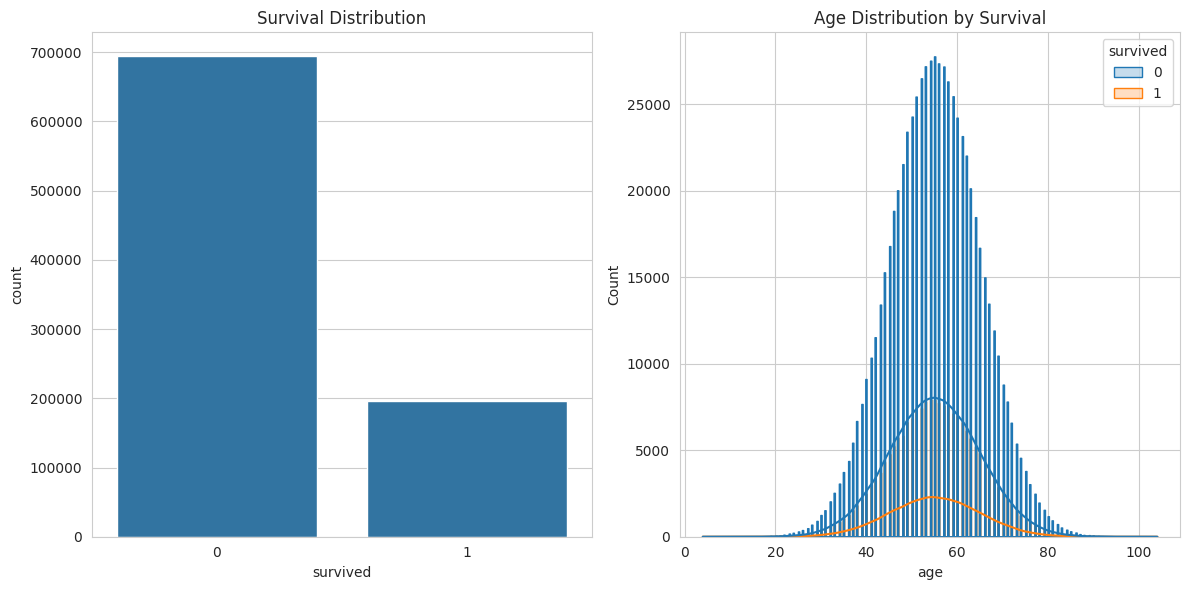

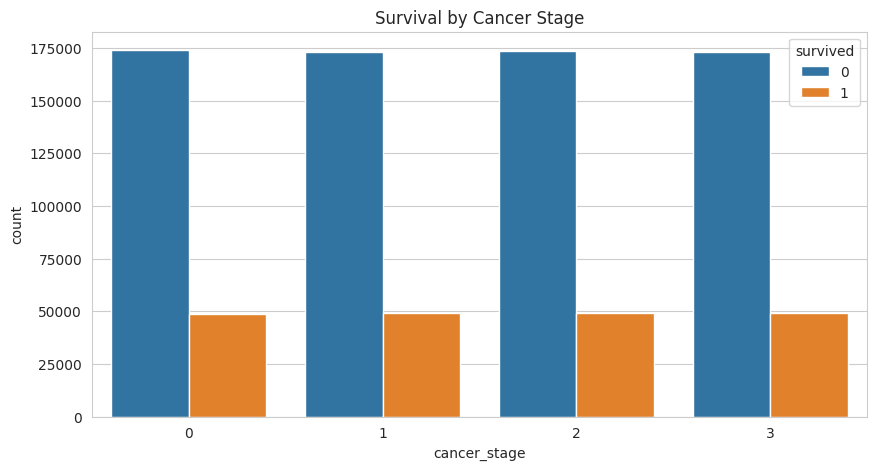

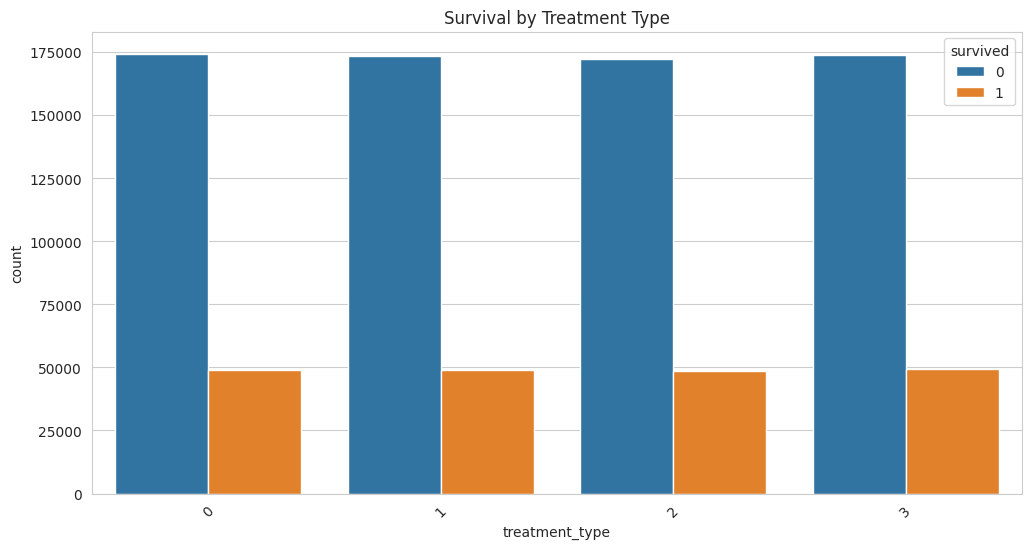

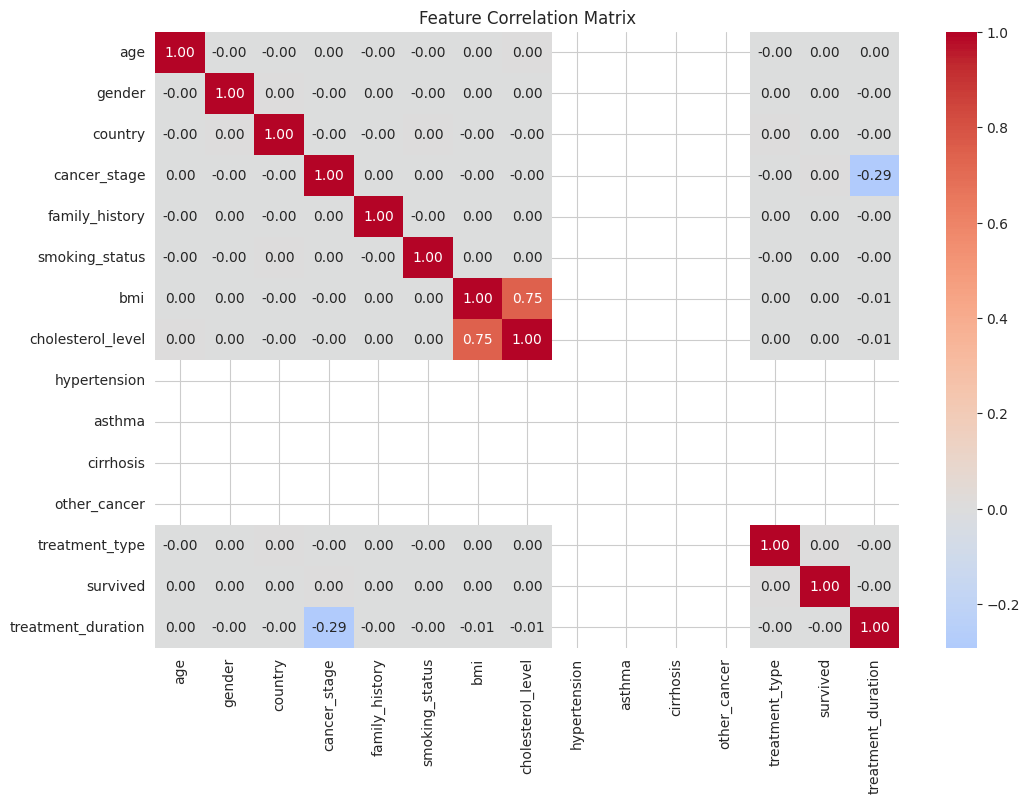

In [ ]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# 1. Target distribution
plt.subplot(1, 2, 1)
sns.countplot(x='survived', data=df)
plt.title('Survival Distribution')

# 2. Age distribution by survival
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', hue='survived', kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

# 3. Cancer stage impact
plt.figure(figsize=(10, 5))
sns.countplot(x='cancer_stage', hue='survived', data=df)
plt.title('Survival by Cancer Stage')
plt.show()

# 4. Treatment type analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='treatment_type', hue='survived', data=df)
plt.title('Survival by Treatment Type')
plt.xticks(rotation=45)
plt.show()

# 5. Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100],
                        labels=['<40', '40-60', '60-80', '80+'])

# BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Cholesterol levels
df['cholesterol_level_category'] = pd.cut(df['cholesterol_level'],
                                        bins=[0, 200, 240, 1000],
                                        labels=['Normal', 'Borderline High', 'High'])

# Encode new categorical features
new_cat_cols = ['age_group', 'bmi_category', 'cholesterol_level_category']
for col in new_cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Drop original columns
df = df.drop(['age', 'bmi', 'cholesterol_level'], axis=1)

print("\nData after feature engineering:")
display(df.head())


Data after feature engineering:


,gender,country,cancer_stage,family_history,smoking_status,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration,age_group,bmi_category,cholesterol_level_category
0,1,26,0,1,3,NaN,NaN,NaN,NaN,0,0,523,1,2,2
1,0,19,2,1,3,NaN,NaN,NaN,NaN,3,1,424,0,1,1
2,0,12,2,1,1,NaN,NaN,NaN,NaN,1,0,370,1,1,1
3,0,1,0,0,3,NaN,NaN,NaN,NaN,0,0,443,0,1,1
4,1,17,0,0,3,NaN,NaN,NaN,NaN,1,0,406,3,0,2


In [ ]:
print("NaN values in features before scaling:")
print(X_train.isnull().sum())

print("\nNaN values in scaled features:")
print(np.isnan(X_train_scaled).sum())

NaN values in features before scaling:
gender                             0
country                            0
cancer_stage                       0
family_history                     0
smoking_status                     0
hypertension                  623000
asthma                        623000
cirrhosis                     623000
other_cancer                  623000
treatment_type                     0
treatment_duration                 0
age_group                          0
bmi_category                       0
cholesterol_level_category         0
dtype: int64

NaN values in scaled features:
2492000


In [ ]:
# For binary medical features - assume missing = condition absent
medical_cols = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']
df[medical_cols] = df[medical_cols].fillna(0)  # 0 = No condition

# Verify
print("Missing values after medical imputation:")
print(df[medical_cols].isnull().sum())

Missing values after medical imputation:
hypertension    0
asthma          0
cirrhosis       0
other_cancer    0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Medical-Specific Imputation
# Create a flag for imputed medical features
medical_cols = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']
for col in medical_cols:
    df[f'{col}_imputed'] = df[col].isna().astype(int)  # 1 if imputed, 0 otherwise
    df[col] = df[col].fillna(0)  # Clinical assumption: missing = absent

In [ ]:
# 2. Define Preprocessing
# Numeric features (median imputation + scaling)
numeric_features = ['age', 'bmi', 'cholesterol_level', 'treatment_duration']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical features (mode imputation + one-hot)
categorical_features = ['gender', 'country', 'cancer_stage', 'smoking_status', 'treatment_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# 3. Combine Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('medical', 'passthrough', medical_cols + [f'{col}_imputed' for col in medical_cols])
    ])

In [ ]:
# 4. Modeling Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# 5. Train-Test Split
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Update numeric_features to use age_group instead of age
numeric_features = ['bmi', 'cholesterol_level', 'treatment_duration']  # Removed 'age'
categorical_features = ['gender', 'country', 'cancer_stage',
                       'smoking_status', 'treatment_type', 'age_group']  # Added 'age_group'

# The rest of my pipeline remains the same
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('medical', 'passthrough', medical_cols + [f'{col}_imputed' for col in medical_cols])
    ])

In [ ]:
print("Current DataFrame columns:")
print(df.columns.tolist())

print("\nMissing values check:")
print(df.isnull().sum())

Current DataFrame columns:
['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'survived', 'treatment_duration', 'age_group', 'bmi_category', 'cholesterol_level_category', 'hypertension_imputed', 'asthma_imputed', 'cirrhosis_imputed', 'other_cancer_imputed']

Missing values check:
gender                        0
country                       0
cancer_stage                  0
family_history                0
smoking_status                0
hypertension                  0
asthma                        0
cirrhosis                     0
other_cancer                  0
treatment_type                0
survived                      0
treatment_duration            0
age_group                     0
bmi_category                  0
cholesterol_level_category    0
hypertension_imputed          0
asthma_imputed                0
cirrhosis_imputed             0
other_cancer_imputed          0
dtype: int64


In [ ]:
# Define feature types based on my current DataFrame
numeric_features = ['treatment_duration']  # Only truly numerical feature
categorical_features = ['gender', 'country', 'cancer_stage', 'smoking_status',
                       'treatment_type', 'age_group', 'bmi_category',
                       'cholesterol_level_category']  # All categorical features
binary_features = ['family_history', 'hypertension', 'asthma',
                  'cirrhosis', 'other_cancer']  # Already binary (0/1)
imputation_flags = ['hypertension_imputed', 'asthma_imputed',
                   'cirrhosis_imputed', 'other_cancer_imputed']  # Your imputation flags

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine all features in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', 'passthrough', binary_features),
        ('flags', 'passthrough', imputation_flags)
    ])

# Create final pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Prepare data
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the pipeline
model.fit(X_train, y_train)

# Train and evaluate (Moved evaluation to a separate cell)
# y_pred = model.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7285

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84    208199
           1       0.22      0.09      0.13     58801

    accuracy                           0.73    267000
   macro avg       0.50      0.50      0.48    267000
weighted avg       0.66      0.73      0.68    267000


Confusion Matrix:
[[189082  19117]
 [ 53381   5420]]
